In [116]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
stopwords = stopwords.words('english') + ['food', 'place', 'restaurant', 'would']
stopwords = set(stopwords)

In [7]:
# Load Data
features = pd.read_csv('../data/processed/features.csv')
review = pd.read_csv('../data/raw/review.csv')
checkin = pd.read_csv('../data/raw/checkin.csv')
business = pd.read_csv('../data/raw/business.csv')

/Users/estherdawes/Documents/yelp-reviews-analytics/yelp-reviews/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
checkin['dates'] = checkin['date'].str.split(',')
checkin.drop('date', axis=1, inplace=True)
df_checkin = checkin.explode('dates')
df_checkin['dates'] = pd.to_datetime(df_checkin['dates'])
df_checkin.sort_values(['business_id', 'dates'], inplace=True)

# Restaurant Performance Metrics for a City

In [9]:
def filter_dataframe(df, state, city):
    dff = df[
        (df["state"] == state)
        & (df["city"] == city)
    ]
    return dff

## Closure Rate, Average Stars, Total Reviews Per Restuarants

In [28]:
State = 'ON'
City = 'Caledon'

In [29]:
dff = filter_dataframe(features, State, City)

In [32]:
print ("Closure Rate: ", round(len(dff[dff['is_open'] == 0]) / len(dff), 2))
print ("Average Stars: ", round(dff['stars_mean_restaurant'].mean(), 2))
print ("Average Review Count: ", round(dff['review_count'].sum()/len(dff), 2))

Closure Rate:  0.29
Average Stars:  3.47
Average Review Count:  7.86


## Monitoring the sentiment of restaurant peformance

In [118]:
df_review = review[review['business_id'].isin(list(dff.business_id))]

In [119]:
text = df_review['text'].str.cat(sep=' ').lower()

In [120]:
wordcloud = WordCloud(background_color="white",
                      stopwords = stopwords
                      ).generate(text)

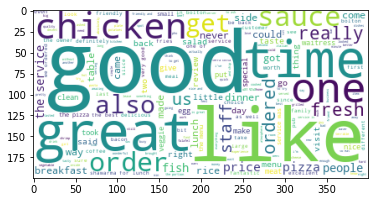

In [121]:
plt.imshow(wordcloud)
plt.show()

## Closed down restaurants reviews sentiment

In [122]:
df_review_open = df_review.merge(features[['is_open', 'business_id']], on='business_id', how='left')
text = df_review_open[df_review_open['is_open']==0]['text'].str.cat(sep=' ').lower()

In [123]:
wordcloud = WordCloud(background_color="white",
                      stopwords = stopwords
                      ).generate(text)

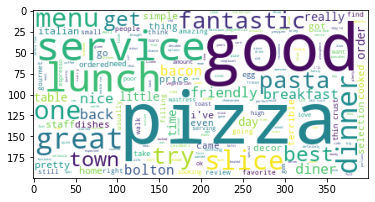

In [124]:
plt.imshow(wordcloud)
plt.show()

## Total check-ins per restaurant, check-ins overtime, the average daily checkins

In [133]:
df_checkin_business = df_checkin[df_checkin['business_id'].isin(list(dff.business_id))]

In [142]:
df_checkin_open = df_checkin_business.merge(features[['is_open', 'business_id']], on='business_id', how='left')

[Text(0, 0, '5jbOkCtqZduyVafxqjPRBQ'),
 Text(0, 0, '8acAXGC76yeHrk1iGYN0cg'),
 Text(0, 0, 'ApIVJCaXz4NN2bFuFIxGIA'),
 Text(0, 0, 'Ejfl3uZKDbZPkmwW5rplJw'),
 Text(0, 0, 'GZOFuQQDXxdjb8w03StJyg'),
 Text(0, 0, 'HcsYw0KVV2mPxTJeGyVk4A'),
 Text(0, 0, 'N0N4mD2DTgR4BR8SlIwLSA'),
 Text(0, 0, 'PltsBW9ST2Rj2mpR0joDmg'),
 Text(0, 0, 'S4llDh8U673kDqT5QDSopA'),
 Text(0, 0, 'T-jZ7he52Vog3pL2zAjSoQ'),
 Text(0, 0, 'UwapKDB94H9WByuCu4S2nw'),
 Text(0, 0, 'W1ruzSm-NrunwxOMzYIUaw'),
 Text(0, 0, 'YNXgldriOshrwCsJeuHQMg'),
 Text(0, 0, 'fAPYjZ_yaYzSewAZJFBGRA'),
 Text(0, 0, 'fUuhvF4mJEvXQIbznydSSw'),
 Text(0, 0, 'pUR0xuSxB-_Wcu_WXDmURQ'),
 Text(0, 0, 'rZRZ7KQ90kjNHX-YIVQhHA'),
 Text(0, 0, 'sCbZOE7EQW5MOJHb5DP5hQ')]

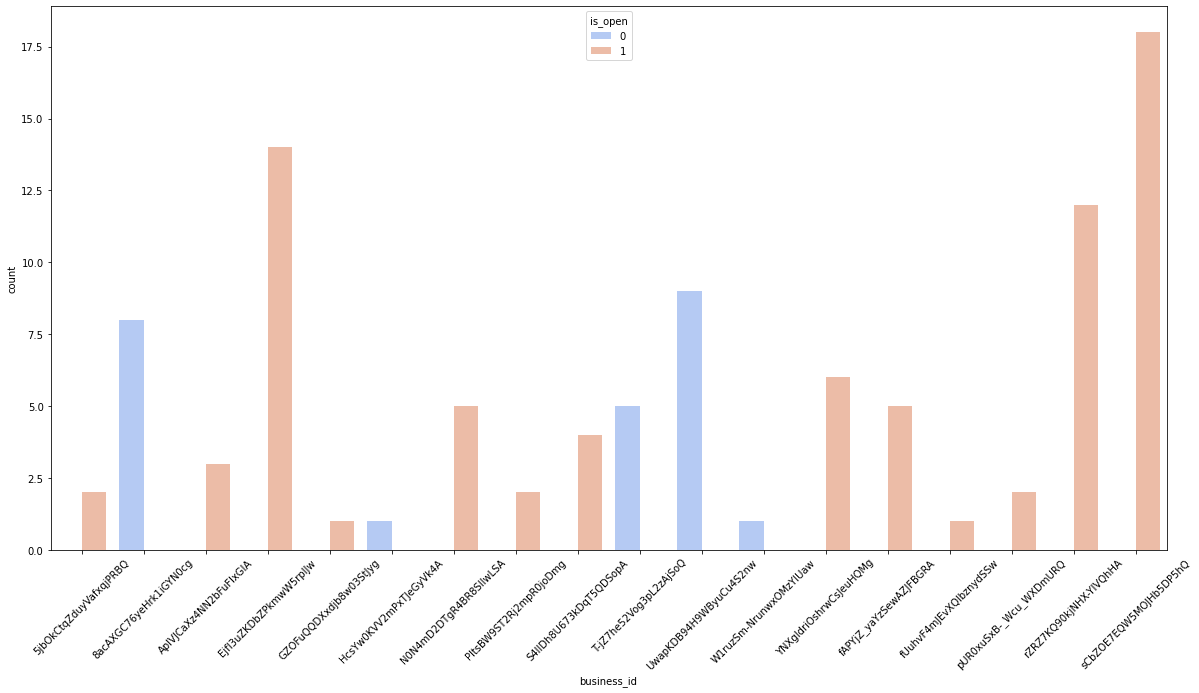

In [163]:
plt.figure(figsize=(20,10))
fig = sns.countplot(x='business_id',
              data=df_checkin_open,
              hue='is_open',
              palette='coolwarm')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

## What are the most famous restaurant categories in the region

In [156]:
def clean(x):
    return [i.strip() for i in x]
        
dff['categories'] = dff['categories'].str.split(',').apply(lambda x: clean(x))

/Users/estherdawes/Documents/yelp-reviews-analytics/yelp-reviews/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [159]:
dff_cats = dff.explode('categories')

[Text(0, 0, 'Bars'),
 Text(0, 0, 'Food'),
 Text(0, 0, 'Nightlife'),
 Text(0, 0, 'Breakfast & Brunch'),
 Text(0, 0, 'Pubs'),
 Text(0, 0, 'Restaurants'),
 Text(0, 0, 'Canadian (New)'),
 Text(0, 0, 'American (Traditional)'),
 Text(0, 0, 'Italian'),
 Text(0, 0, 'Mediterranean'),
 Text(0, 0, 'Middle Eastern'),
 Text(0, 0, 'Thai'),
 Text(0, 0, 'Asian Fusion'),
 Text(0, 0, 'Chinese'),
 Text(0, 0, 'Bubble Tea'),
 Text(0, 0, 'Vietnamese'),
 Text(0, 0, 'Pan Asian'),
 Text(0, 0, 'Fast Food'),
 Text(0, 0, 'Sandwiches'),
 Text(0, 0, 'Pizza'),
 Text(0, 0, 'Caribbean'),
 Text(0, 0, 'Fish & Chips'),
 Text(0, 0, 'Diners'),
 Text(0, 0, 'Falafel'),
 Text(0, 0, 'Mexican'),
 Text(0, 0, 'Chicken Wings'),
 Text(0, 0, 'Bakeries')]

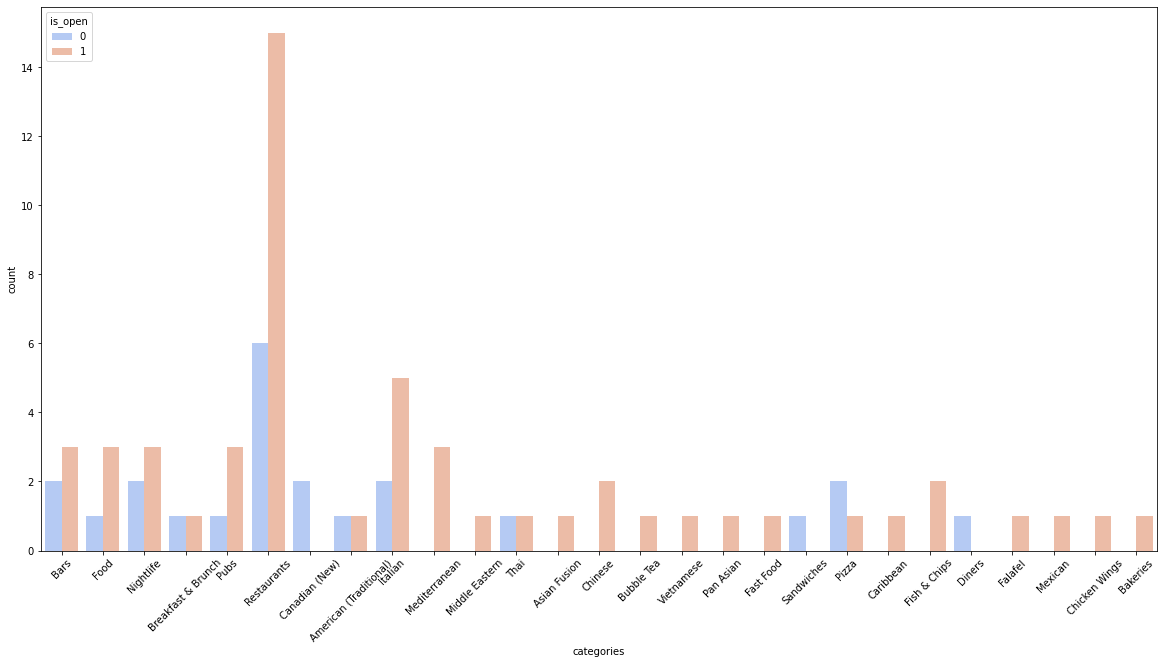

In [162]:
plt.figure(figsize=(20,10))
fig = sns.countplot(x='categories',
              data=dff_cats,
              hue='is_open',
              palette='coolwarm')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

## The distribution of stars per restaurant category

[Text(0, 0, 'Bars'),
 Text(0, 0, 'Food'),
 Text(0, 0, 'Nightlife'),
 Text(0, 0, 'Breakfast & Brunch'),
 Text(0, 0, 'Pubs'),
 Text(0, 0, 'Restaurants'),
 Text(0, 0, 'Canadian (New)'),
 Text(0, 0, 'American (Traditional)'),
 Text(0, 0, 'Italian'),
 Text(0, 0, 'Mediterranean'),
 Text(0, 0, 'Middle Eastern'),
 Text(0, 0, 'Thai'),
 Text(0, 0, 'Asian Fusion'),
 Text(0, 0, 'Chinese'),
 Text(0, 0, 'Bubble Tea'),
 Text(0, 0, 'Vietnamese'),
 Text(0, 0, 'Pan Asian'),
 Text(0, 0, 'Fast Food'),
 Text(0, 0, 'Sandwiches'),
 Text(0, 0, 'Pizza'),
 Text(0, 0, 'Caribbean'),
 Text(0, 0, 'Fish & Chips'),
 Text(0, 0, 'Diners'),
 Text(0, 0, 'Falafel'),
 Text(0, 0, 'Mexican'),
 Text(0, 0, 'Chicken Wings'),
 Text(0, 0, 'Bakeries')]

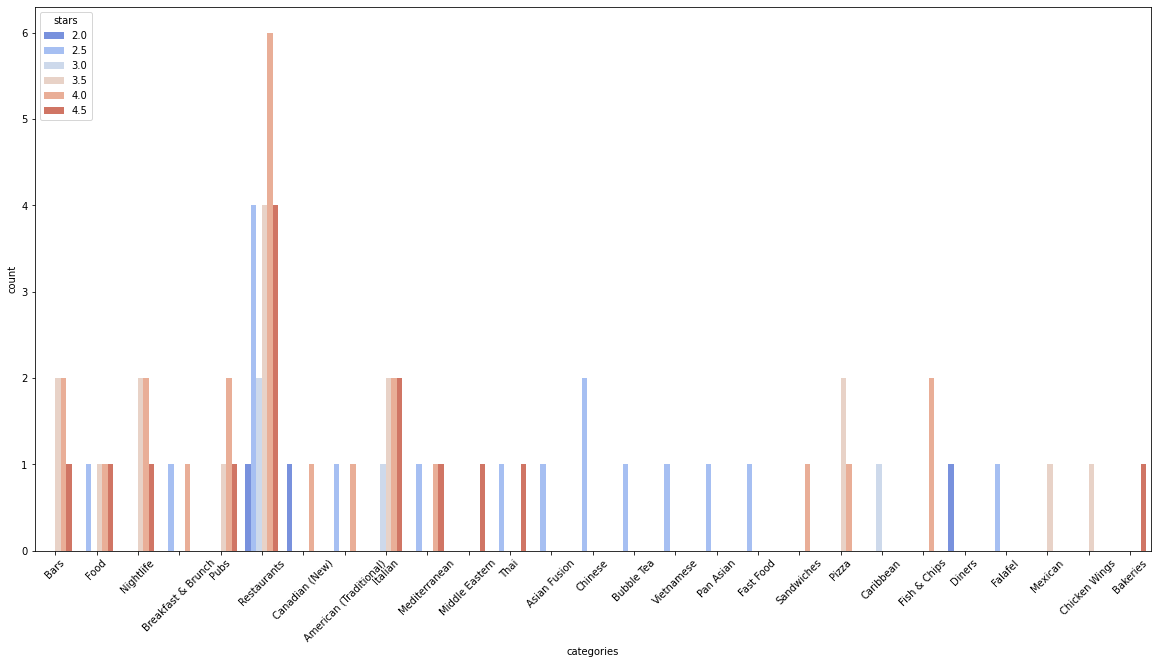

In [167]:
plt.figure(figsize=(20,10))
fig = sns.countplot(x='categories',
              data=dff_cats,
              hue='stars',
              palette='coolwarm')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

# What are the features that are import to determine the success of the restaurant? 

In [168]:
num_features = ['stars_mean_neighborhood', 'stars_mean_restaurant',\
                'stars_median', 'stars_coef', 'review_count', 'popularity']
cat_features = ['neighbor_labels', 'is_above_average']

In [169]:
features[num_features].corr()

,stars_mean_neighborhood,stars_mean_restaurant,stars_median,stars_coef,review_count,popularity
stars_mean_neighborhood,1.000000,0.103916,0.103988,0.000041,0.017995,0.020827
stars_mean_restaurant,0.103916,1.000000,0.999970,0.012319,0.138463,0.174457
stars_median,0.103988,0.999970,1.000000,0.011987,0.141123,0.177282
stars_coef,0.000041,0.012319,0.011987,1.000000,0.013387,0.012908
review_count,0.017995,0.138463,0.141123,0.013387,1.000000,0.990688
popularity,0.020827,0.174457,0.177282,0.012908,0.990688,1.000000


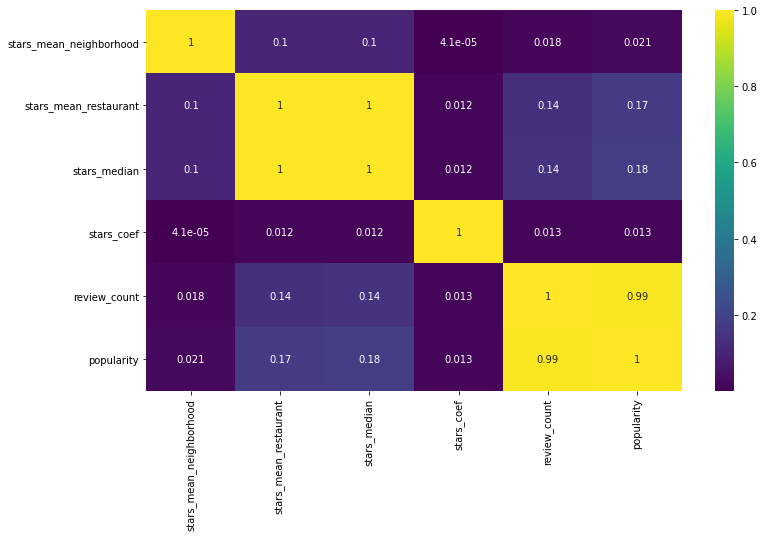

In [171]:
plt.figure(figsize=(12,7))
sns.heatmap(features[num_features].corr(),annot=True,cmap='viridis')

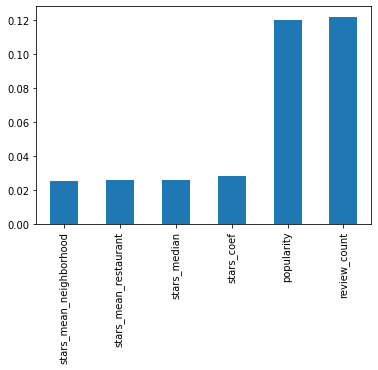

In [173]:
num_features_label = num_features + ['is_open']
features[num_features_label].corr()['is_open'].sort_values().drop('is_open').plot(kind='bar')